In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR, SVC

sns.set(style="whitegrid")

# Synthetic regression data (non-linear)
np.random.seed(42)
X_reg = np.linspace(-3, 3, 100).reshape(-1, 1)
y_reg = np.sinc(X_reg).ravel() + 0.1 * np.random.randn(100)

# Synthetic classification data (non-linearly separable)
from sklearn.datasets import make_moons
X_clf, y_clf = make_moons(n_samples=100, noise=0.2, random_state=42)


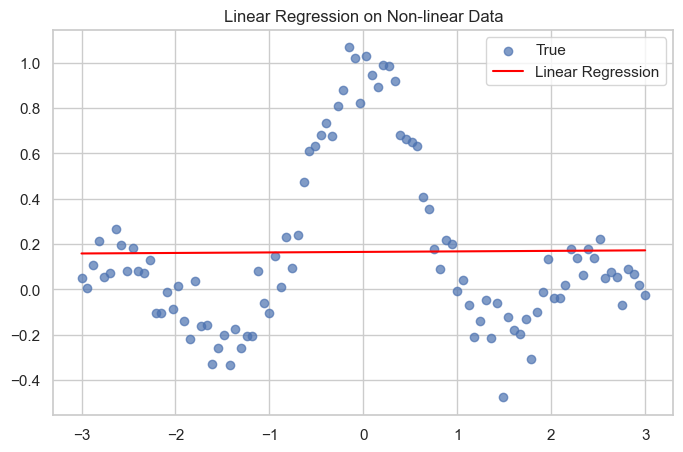

In [51]:
# Linear Regression on non-linear data
lin_reg = LinearRegression()
lin_reg.fit(X_reg, y_reg)
y_pred_lin = lin_reg.predict(X_reg)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_reg, y_reg, label="True", alpha=0.7)
plt.plot(X_reg, y_pred_lin, color="red", label="Linear Regression")
plt.title("Linear Regression on Non-linear Data")
plt.legend()
plt.show()


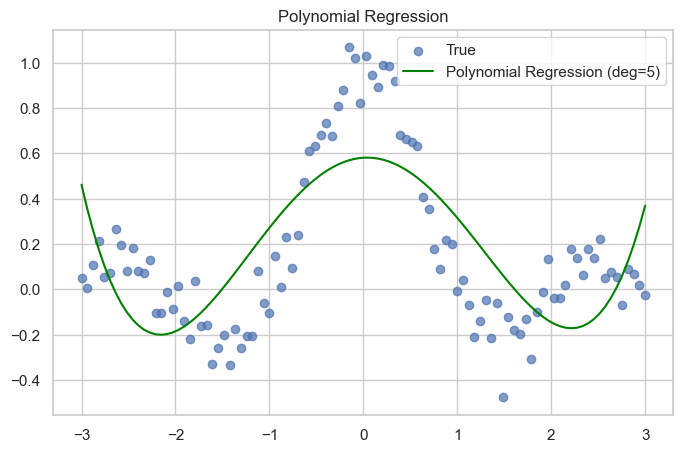

In [53]:
# Polynomial Regression (degree 5)
poly_reg = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
poly_reg.fit(X_reg, y_reg)
y_pred_poly = poly_reg.predict(X_reg)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_reg, y_reg, label="True", alpha=0.7)
plt.plot(X_reg, y_pred_poly, color="green", label="Polynomial Regression (deg=5)")
plt.title("Polynomial Regression")
plt.legend()
plt.show()


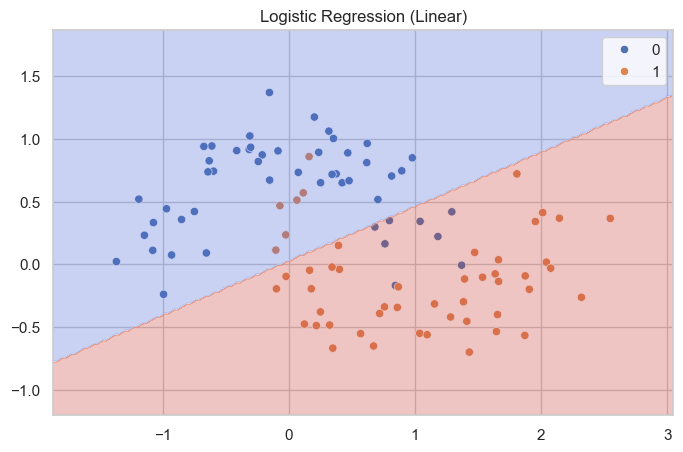

In [55]:
# Logistic Regression (linear)
log_reg = LogisticRegression()
log_reg.fit(X_clf, y_clf)

# Plot
plt.figure(figsize=(8, 5))
plt.title("Logistic Regression (Linear)")
sns.scatterplot(x=X_clf[:, 0], y=X_clf[:, 1], hue=y_clf)

# Decision boundary
x_min, x_max = X_clf[:, 0].min() - .5, X_clf[:, 0].max() + .5
y_min, y_max = X_clf[:, 1].min() - .5, X_clf[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.show()


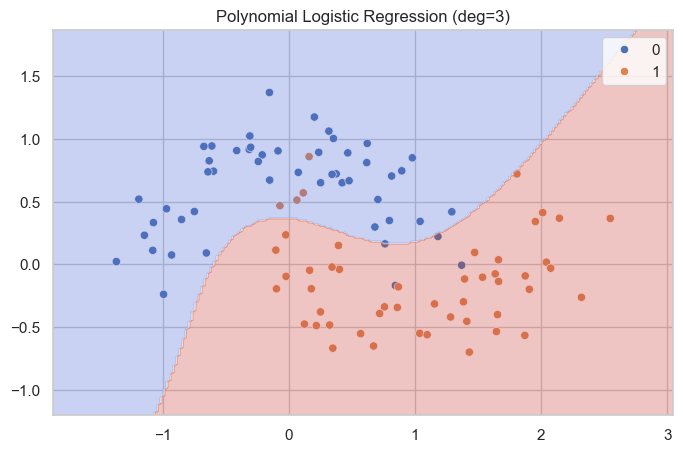

In [57]:
# Polynomial Logistic Regression (degree 3)
poly_clf = make_pipeline(PolynomialFeatures(degree=3), LogisticRegression())
poly_clf.fit(X_clf, y_clf)

# Plot
plt.figure(figsize=(8, 5))
plt.title("Polynomial Logistic Regression (deg=3)")
sns.scatterplot(x=X_clf[:, 0], y=X_clf[:, 1], hue=y_clf)

# Decision boundary
Z = poly_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.show()


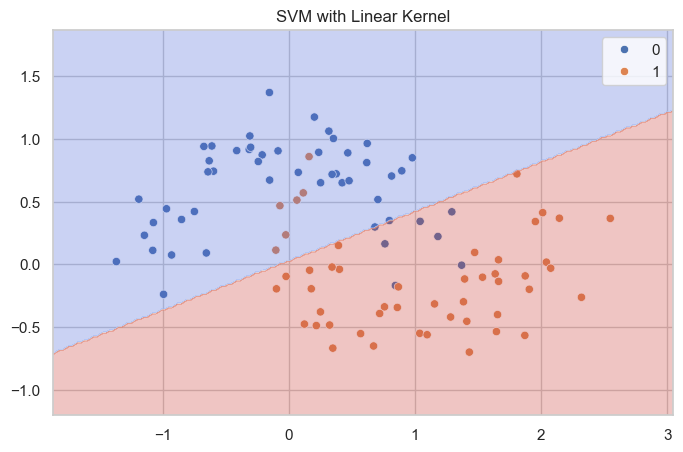

In [59]:
# SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_clf, y_clf)

# Plot
plt.figure(figsize=(8, 5))
plt.title("SVM with Linear Kernel")
sns.scatterplot(x=X_clf[:, 0], y=X_clf[:, 1], hue=y_clf)

Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.show()


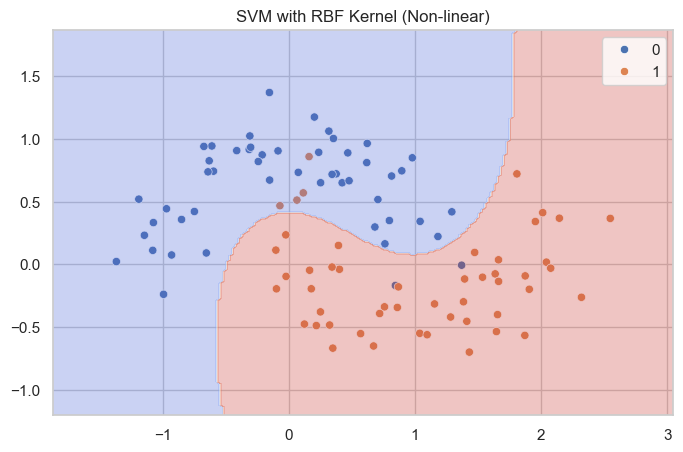

In [61]:
# SVM with RBF kernel (non-linear)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_clf, y_clf)

# Plot
plt.figure(figsize=(8, 5))
plt.title("SVM with RBF Kernel (Non-linear)")
sns.scatterplot(x=X_clf[:, 0], y=X_clf[:, 1], hue=y_clf)

Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.show()


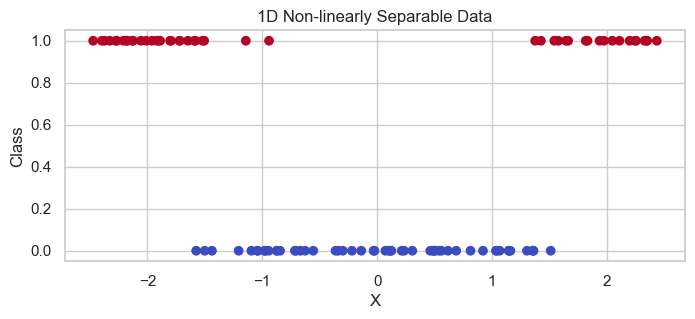

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate 1D data
np.random.seed(42)
X_1d = np.sort(5 * np.random.rand(100, 1) - 2.5, axis=0)  # values between -2.5 and 2.5
y_1d = (X_1d[:, 0]**2 + 0.5 * np.random.randn(100) > 2).astype(int)  # curved separation

# Visualize the 1D data
plt.figure(figsize=(8, 3))
plt.scatter(X_1d, y_1d, c=y_1d, cmap='coolwarm')
plt.title("1D Non-linearly Separable Data")
plt.xlabel("X")
plt.ylabel("Class")
plt.grid(True)
plt.show()


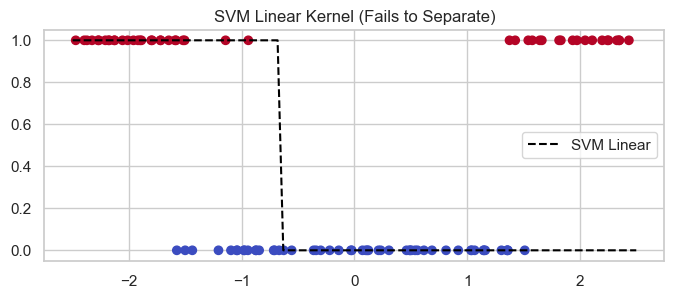

In [65]:
# SVM with linear kernel (expected to fail)
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_1d, y_1d)

# Plot
plt.figure(figsize=(8, 3))
plt.scatter(X_1d, y_1d, c=y_1d, cmap='coolwarm')
x_vals = np.linspace(-2.5, 2.5, 100).reshape(-1, 1)
y_pred = svc_linear.predict(x_vals)
plt.plot(x_vals, y_pred, color='black', linestyle='--', label="SVM Linear")
plt.title("SVM Linear Kernel (Fails to Separate)")
plt.legend()
plt.grid(True)
plt.show()


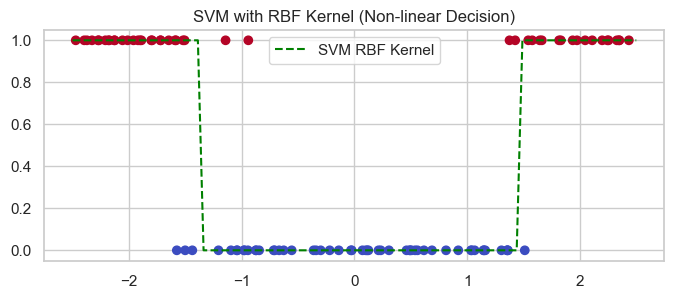

In [67]:
# SVM with RBF kernel (non-linear)
svc_rbf = SVC(kernel='rbf', C=1, gamma=1)
svc_rbf.fit(X_1d, y_1d)

# Predict
y_pred_rbf = svc_rbf.predict(x_vals)

# Plot
plt.figure(figsize=(8, 3))
plt.scatter(X_1d, y_1d, c=y_1d, cmap='coolwarm')
plt.plot(x_vals, y_pred_rbf, color='green', linestyle='--', label="SVM RBF Kernel")
plt.title("SVM with RBF Kernel (Non-linear Decision)")
plt.legend()
plt.grid(True)
plt.show()


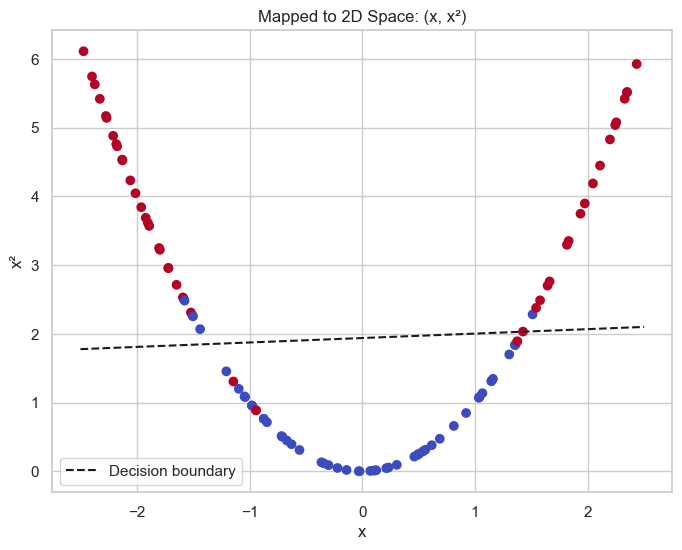

In [69]:
# Manually add second dimension
X_2d = np.hstack([X_1d, X_1d**2])

# Train SVM on transformed data
svc_manual = SVC(kernel='linear')
svc_manual.fit(X_2d, y_1d)

# Plot in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_1d, cmap='coolwarm')
plt.title("Mapped to 2D Space: (x, x²)")
plt.xlabel("x")
plt.ylabel("x²")
plt.grid(True)

# Decision boundary
w = svc_manual.coef_[0]
b = svc_manual.intercept_[0]
xx = np.linspace(-2.5, 2.5, 100)
yy = -(w[0] * xx + b) / w[1]
plt.plot(xx, yy, 'k--', label='Decision boundary')
plt.legend()
plt.show()


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting


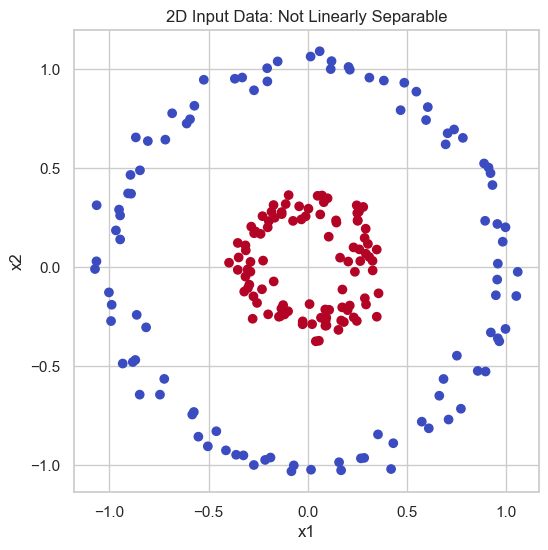

In [73]:
# Create 2D non-linearly separable data (concentric circles)
X, y = make_circles(n_samples=200, factor=0.3, noise=0.05, random_state=42)

# Plot original 2D data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("2D Input Data: Not Linearly Separable")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


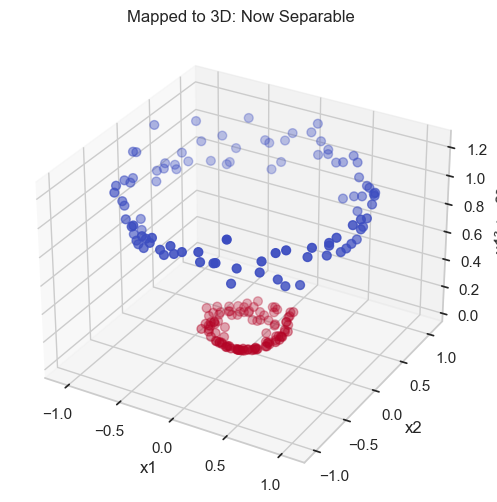

In [74]:
# Map data to 3D space: x1, x2, r = x1^2 + x2^2
X_3d = np.c_[X, np.sum(X**2, axis=1)]  # third dimension is radial feature

# 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='coolwarm', s=40)
ax.set_title("Mapped to 3D: Now Separable")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x1² + x2²")
plt.show()


In [76]:
# Train SVM with RBF kernel (automatically maps to higher dimensions)
svm_rbf = SVC(kernel='rbf', C=10, gamma=1)
svm_rbf.fit(X, y)


SVC(C=10, gamma=1)

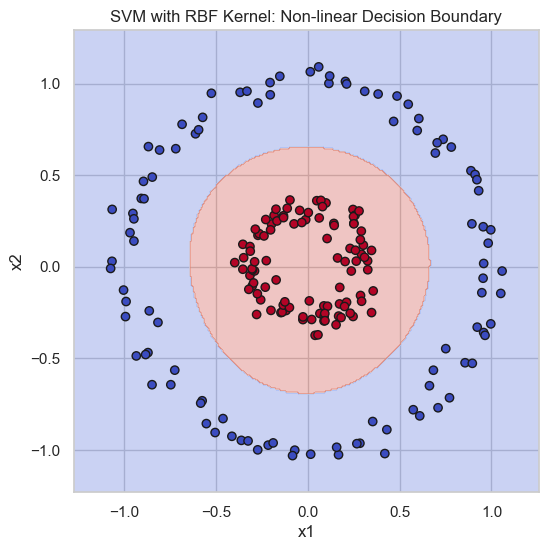

In [78]:
# Visualize decision boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("SVM with RBF Kernel: Non-linear Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


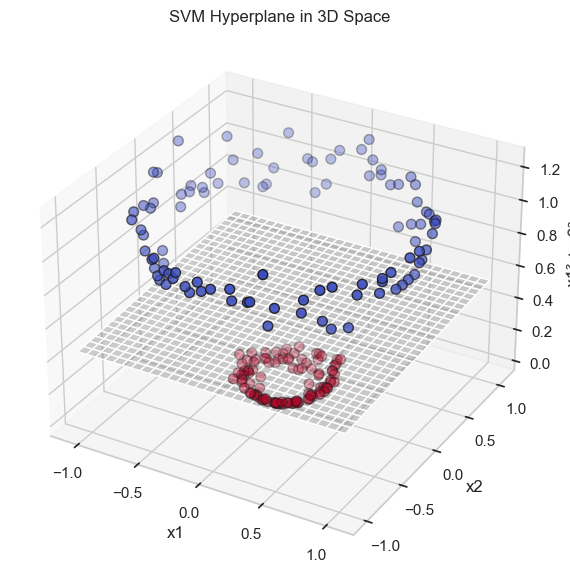

In [80]:
# Get weights and bias
w = svm_3d.coef_[0]
b = svm_3d.intercept_[0]

# Create mesh grid for x and y
xx, yy = np.meshgrid(np.linspace(X_3d[:, 0].min(), X_3d[:, 0].max(), 30),
                     np.linspace(X_3d[:, 1].min(), X_3d[:, 1].max(), 30))

# Calculate z (height) of the plane
# Plane equation: w1*x + w2*y + w3*z + b = 0 => z = -(w1*x + w2*y + b)/w3
zz = -(w[0] * xx + w[1] * yy + b) / w[2]

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter original points
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='coolwarm', s=50, edgecolor='k')

# Plot decision plane
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

# Labels and title
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x1² + x2²")
ax.set_title("SVM Hyperplane in 3D Space")
plt.show()


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Create simple 2D dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# Train SVM with linear kernel
model = SVC(kernel='linear', C=1)
model.fit(X, y)



SVC(C=1, kernel='linear')

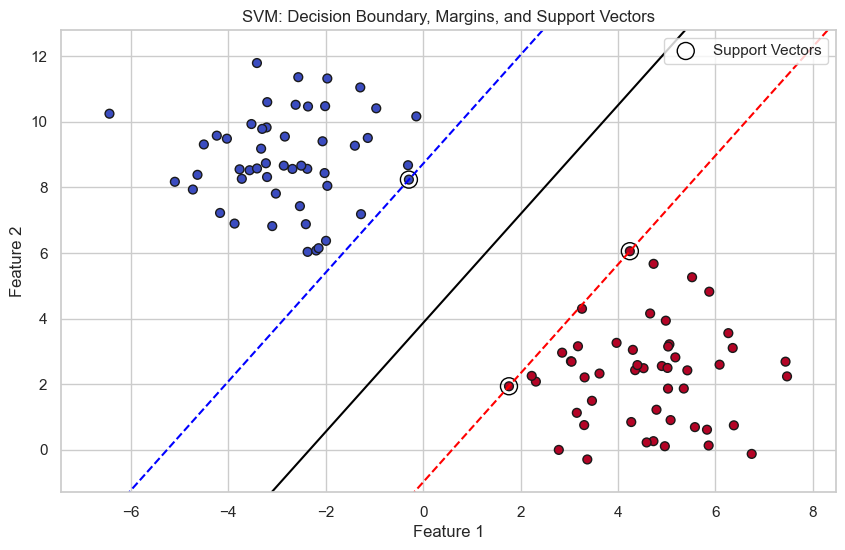

In [86]:
# Get model parameters
w = model.coef_[0]        # Weight vector
b = model.intercept_[0]   # Bias

# Create grid to evaluate model
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Calculate decision function values
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot everything
plt.figure(figsize=(10, 6))

# Scatter the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=40, edgecolors='k')

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'])

# Highlight support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=150, linewidth=1, facecolors='none', edgecolors='black', label="Support Vectors")

# Labels
plt.title("SVM: Decision Boundary, Margins, and Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [88]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Create overlapping classes
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           class_sep=0.7, flip_y=0.1, random_state=42)

# SVM with soft margin
clf = SVC(kernel='linear', C=1)  # you can try C=0.1 or C=100 to see effects
clf.fit(X, y)


SVC(C=1, kernel='linear')

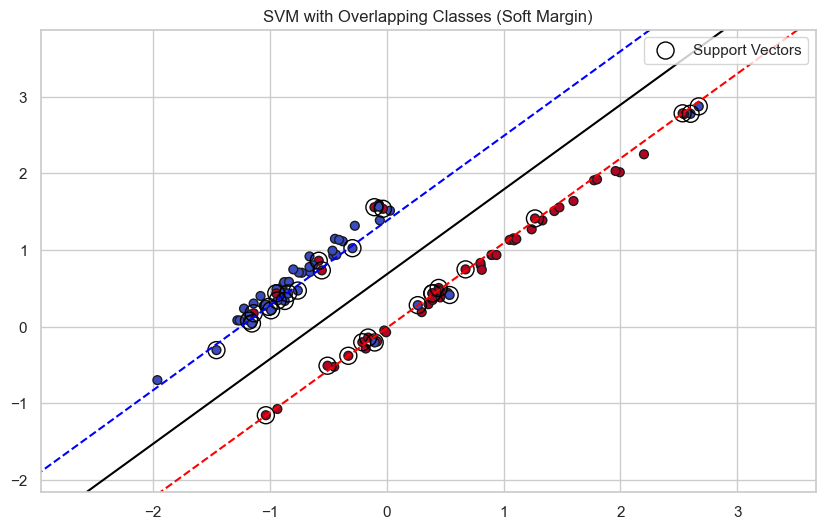

In [90]:
# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

# Create grid
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'])

# Plot points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=40, edgecolors='k')

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=150, linewidth=1, facecolors='none', edgecolors='black', label="Support Vectors")

plt.title("SVM with Overlapping Classes (Soft Margin)")
plt.legend()
plt.grid(True)
plt.show()


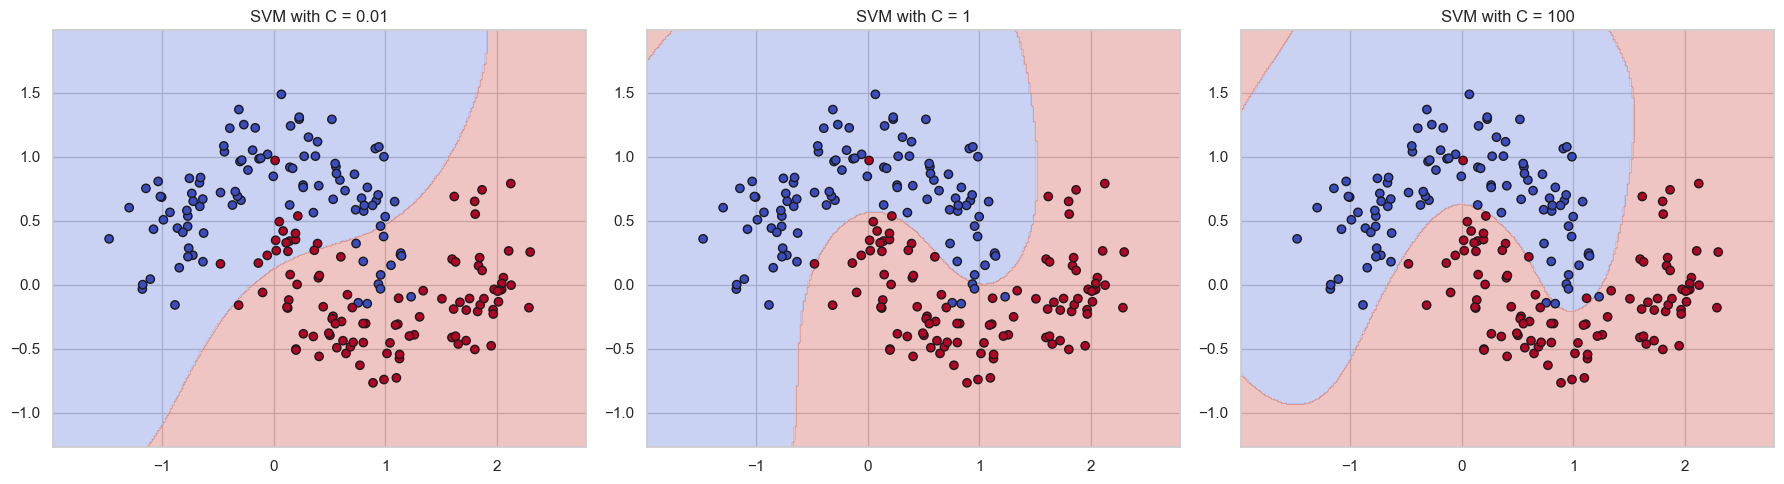

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Create nonlinear data
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Different C values to compare
C_values = [0.01, 1, 100]

# Plot
plt.figure(figsize=(18, 5))

for i, C in enumerate(C_values):
    clf = SVC(kernel='rbf', C=C, gamma=1)
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(f"SVM with C = {C}")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Create non-linear dataset (moons)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)


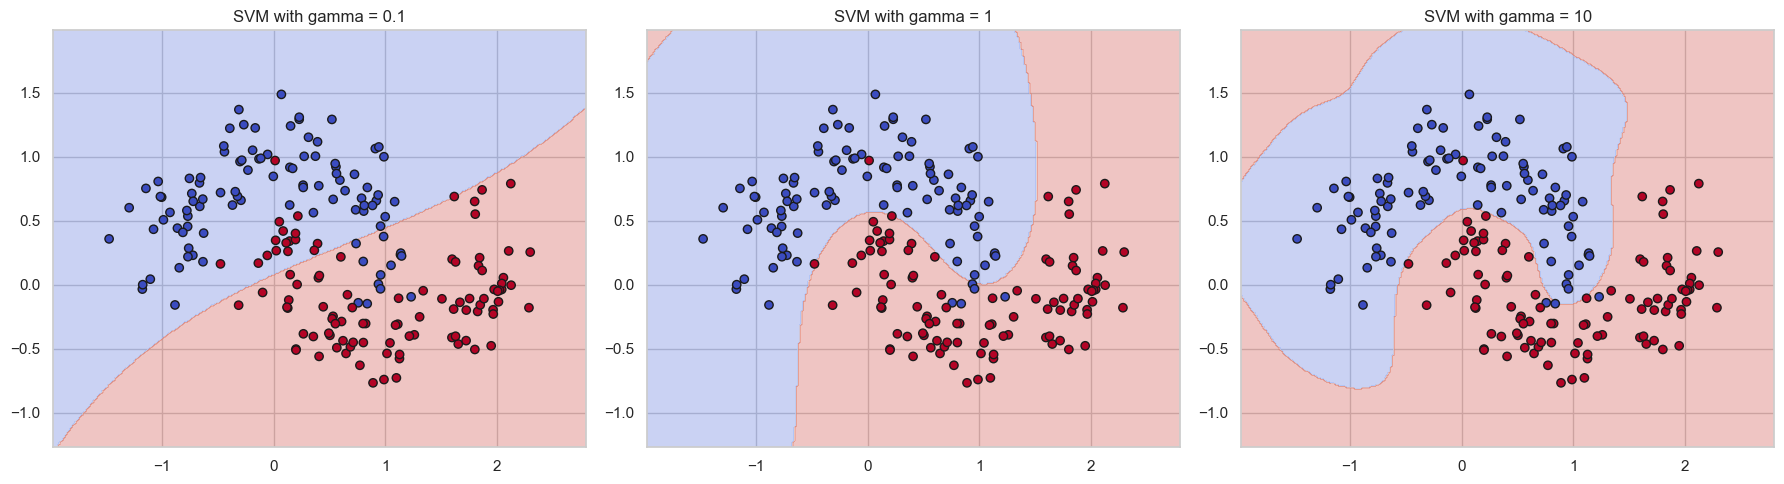

In [96]:
# Try different gamma values
gamma_values = [0.1, 1, 10]

# Plot
plt.figure(figsize=(18, 5))

for i, gamma in enumerate(gamma_values):
    clf = SVC(kernel='rbf', gamma=gamma, C=1)
    clf.fit(X, y)
    
    # Create meshgrid
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(f"SVM with gamma = {gamma}")
    plt.grid(True)

plt.tight_layout()
plt.show()
